# 1-Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings("ignore")

In [6]:
!pip install pymysql

# 2 - Performing ETL(Extract,Transform,Load)pipeline from MYSQL Database
#We will not transform here since  we already preprocessed and cleaned data in SQL

In [9]:
import pandas as pd
from sqlalchemy import create_engine


user = 'root'
password = 'Us01012003'  
host = '127.0.0.1'
port = '3306'
database = 'Walmart'

# Corrected SQLAlchemy( Extracting Data)
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")


query = "SELECT * FROM walmart_clean c join product p on c.product_id=p.product_id"



# Loading the dataset
df = pd.read_sql(query, engine)


In [11]:
# 3 - Understanding/Viewing the Dataset 

In [13]:
df.head()

,User_ID,product_id,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,z_score,product_id,SKU,Product_Name,Product_Brand,Product_Category_Name,Product_Category_ID
0,1000049,P00000142,M,18-25,12,C,4+,1,3,13353,0.811206,P00000142,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
1,1000181,P00000142,M,18-25,17,C,1,0,3,5396,0.767182,P00000142,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
2,1000182,P00000142,M,18-25,4,C,0,0,3,13301,0.800891,P00000142,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
3,1000215,P00000142,M,36-45,14,C,1,1,3,10620,0.269075,P00000142,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
4,1000306,P00000142,M,18-25,0,C,3,0,3,8297,0.191726,P00000142,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15


In [15]:
df.shape

(1099415, 17)

In [17]:
df.columns

Index(['User_ID', 'product_id', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'z_score', 'product_id', 'SKU', 'Product_Name',
       'Product_Brand', 'Product_Category_Name', 'Product_Category_ID'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099415 entries, 0 to 1099414
Data columns (total 17 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   User_ID                     1099415 non-null  int64  
 1   product_id                  1099415 non-null  object 
 2   Gender                      1099415 non-null  object 
 3   Age                         1099415 non-null  object 
 4   Occupation                  1099415 non-null  int64  
 5   City_Category               1099415 non-null  object 
 6   Stay_In_Current_City_Years  1099415 non-null  object 
 7   Marital_Status              1099415 non-null  int64  
 8   Product_Category            1099415 non-null  int64  
 9   Purchase                    1099415 non-null  int64  
 10  z_score                     1099415 non-null  float64
 11  product_id                  1099415 non-null  object 
 12  SKU                         1099415 non-null  object 
 1

In [20]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase,z_score,Product_Category_ID
count,1.099415e+06,1.099415e+06,1.099415e+06,1.099415e+06,1.099415e+06,1.099415e+06,1.099415e+06
mean,1.752576e+06,8.076414e+00,4.096288e-01,5.401266e+00,9.253150e+03,8.067021e-01,9.636932e+00
std,7.772969e+05,6.522459e+00,4.917655e-01,3.935750e+00,5.026524e+03,5.860152e-01,4.793060e+00
min,1.000001e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,9.257681e-05,1.000000e+00
25%,1.003074e+06,2.000000e+00,0.000000e+00,1.000000e+00,5.684000e+03,3.222501e-01,5.000000e+00
50%,1.006037e+06,7.000000e+00,0.000000e+00,5.000000e+00,8.069000e+03,6.681981e-01,1.100000e+01
75%,2.502884e+06,1.400000e+01,1.000000e+00,8.000000e+00,1.213500e+04,1.207949e+00,1.400000e+01
max,3.005979e+06,2.000000e+01,1.000000e+00,2.000000e+01,2.438500e+04,2.999565e+00,1.600000e+01


In [23]:
df = df.drop(df.columns[11], axis=1)


In [25]:
df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,z_score,SKU,Product_Name,Product_Brand,Product_Category_Name,Product_Category_ID
0,1000049,M,18-25,12,C,4+,1,3,13353,0.811206,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
1,1000181,M,18-25,17,C,1,0,3,5396,0.767182,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
2,1000182,M,18-25,4,C,0,0,3,13301,0.800891,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
3,1000215,M,36-45,14,C,1,1,3,10620,0.269075,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
4,1000306,M,18-25,0,C,3,0,3,8297,0.191726,COMP-LEN-894,Lenovo Computers 198,Lenovo,Computers,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099410,2971804,F,0-17,20,B,2,1,5,6503,0.547592,ELEC-LG-548,LG Electronics 820,LG,Electronics,12
1099411,2947549,F,51-55,0,B,4+,1,5,3739,1.095872,ELEC-LG-548,LG Electronics 820,LG,Electronics,12
1099412,2859709,M,55+,11,B,4+,0,5,1938,1.453127,ELEC-LG-548,LG Electronics 820,LG,Electronics,12
1099413,2830084,F,36-45,7,A,4+,0,5,6432,0.561676,ELEC-LG-548,LG Electronics 820,LG,Electronics,12


In [27]:
df.nunique()

User_ID                       429202
Gender                             2
Age                                7
Occupation                        21
City_Category                      3
Stay_In_Current_City_Years         5
Marital_Status                     2
Product_Category                  20
Purchase                       23710
z_score                        23710
SKU                             3195
Product_Name                    3185
Product_Brand                     10
Product_Category_Name              6
Product_Category_ID               16
dtype: int64

# 4 - Transforming/Cleaning Data

# (A) -Checking for Null Values

In [31]:
#Checking for null
df.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
z_score                       0
SKU                           0
Product_Name                  0
Product_Brand                 0
Product_Category_Name         0
Product_Category_ID           0
dtype: int64

In [32]:
# (B) - Checking for Duplicated Enteries

In [35]:
#Checking for Duplicate Values
df.duplicated().sum()

0

In [36]:
# (C) - Checking for Outliers

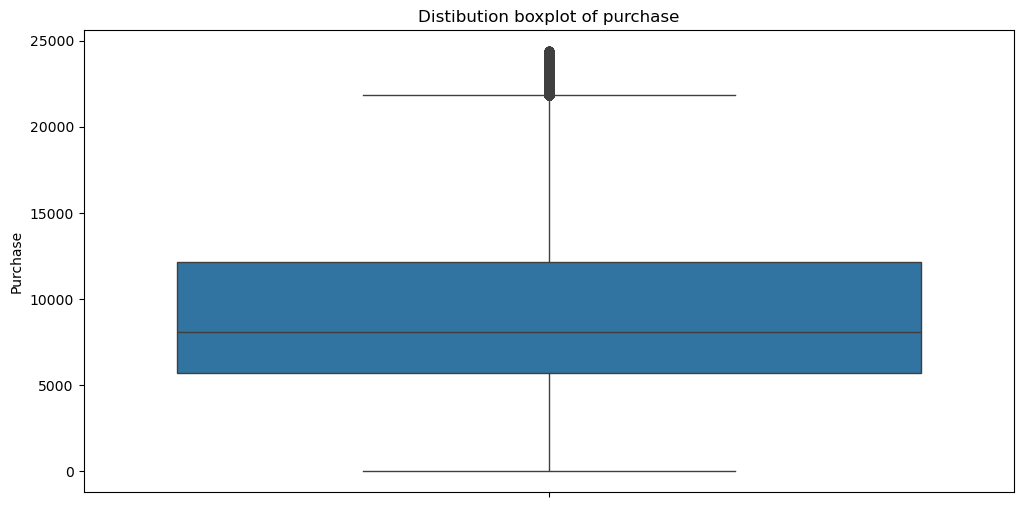

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(df["Purchase"])
plt.title("Distibution boxplot of purchase")
plt.show()

<Figure size 1600x800 with 0 Axes>

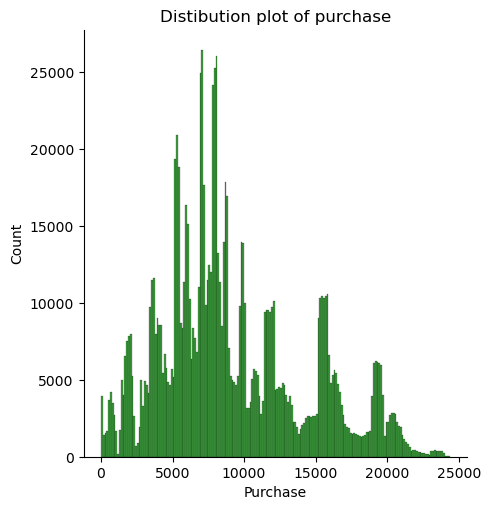

In [40]:
plt.figure(figsize=(16,8))
sns.displot(df["Purchase"],color="green")
plt.title("Distibution plot of purchase")
plt.show()

# From boxplot we can see there are some outliers still exist so we will try to remove it using IQR Since distribution is skewed right

In [43]:
q1 = df["Purchase"].quantile(0.25)
q3 = df["Purchase"].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print(lower,upper)

-3992.5 21811.5


In [46]:
print(f"Total Outliers :{len(df[df["Purchase"]>=upper])})")

Total Outliers :5723)


In [48]:
#(D) -  Capping Outliers

In [50]:
df["Purchase"] = np.where(df["Purchase"]>=upper,upper,df["Purchase"])

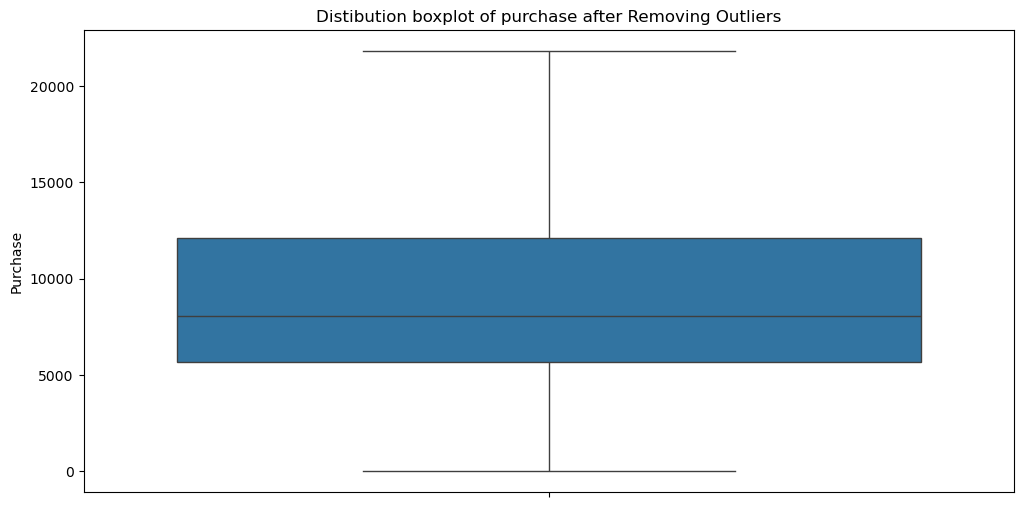

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(df["Purchase"])
plt.title("Distibution boxplot of purchase after Removing Outliers")
plt.show()

# 5- Explanatory Data Analysis(EDA) based on Demographics and SKUs

# (A) -  Find Proportion of Walmart Customers based on Gender,City,Stay in city,marital_status

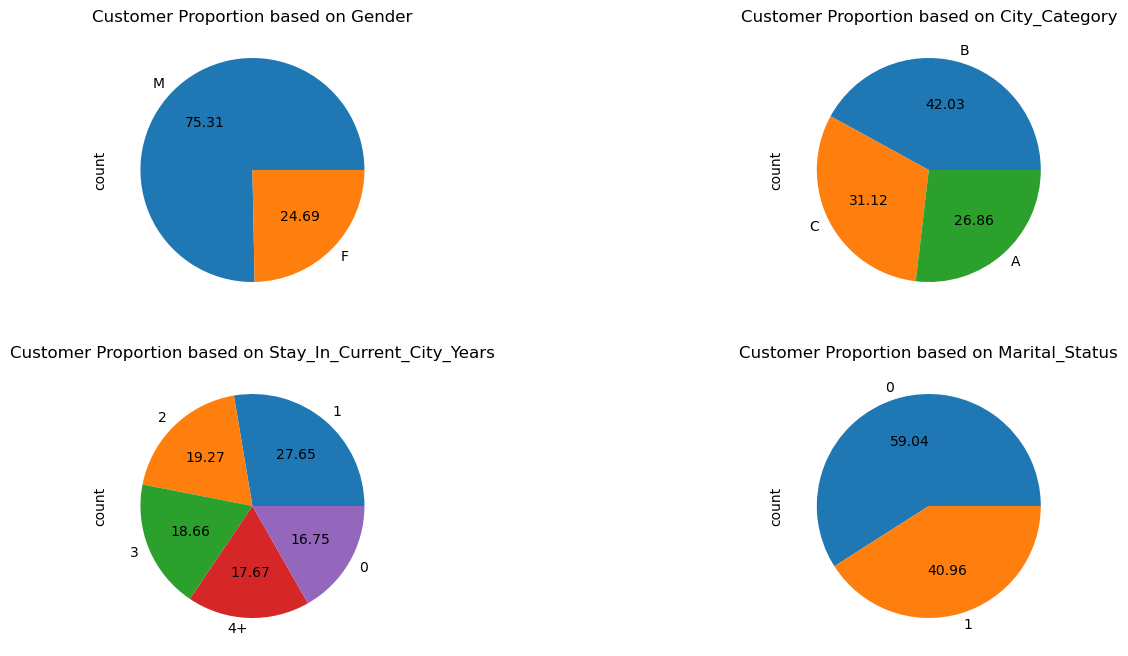

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title("Customer Proportion based on Gender")
df["Gender"].value_counts().plot(kind="pie",autopct="%0.2f")


plt.subplot(2,2,2)
plt.title("Customer Proportion based on City_Category")
df["City_Category"].value_counts().plot(kind="pie",autopct="%0.2f")

plt.subplot(2,2,3)
plt.title("Customer Proportion based on Stay_In_Current_City_Years")
df["Stay_In_Current_City_Years"].value_counts().plot(kind="pie",autopct="%0.2f")


plt.subplot(2,2,4)
plt.title("Customer Proportion based on Marital_Status")
df["Marital_Status"].value_counts().plot(kind="pie",autopct="%0.2f")

plt.show()

# Insights-:
1 -Customer Gender Distribution: 75% of Walmart customers are male, while only 25% are female, indicating a significant gender gap in shopping behavior.

2-City-Wise Customer Distribution The majority (42%) of customers are from City B, followed by City C (31%) and City A (27%), highlighting City B as the primary customer base.


3 -Customer Residency Duration 27% of customers have lived in their city for at least 1 year, and they show higher purchasing behavior. Newer residents tend to spend less, suggesting customer tenure is positively correlated with shopping frequency or value.


4 - Marital Status Distribution A significant portion—60% of customers—are unmarried, making them the dominant demographic group in Walmart’s customer base.

# (B) - What is Mean Spend by Customer in Walmart Stores based on Gender,City,Stay in city,marital_status

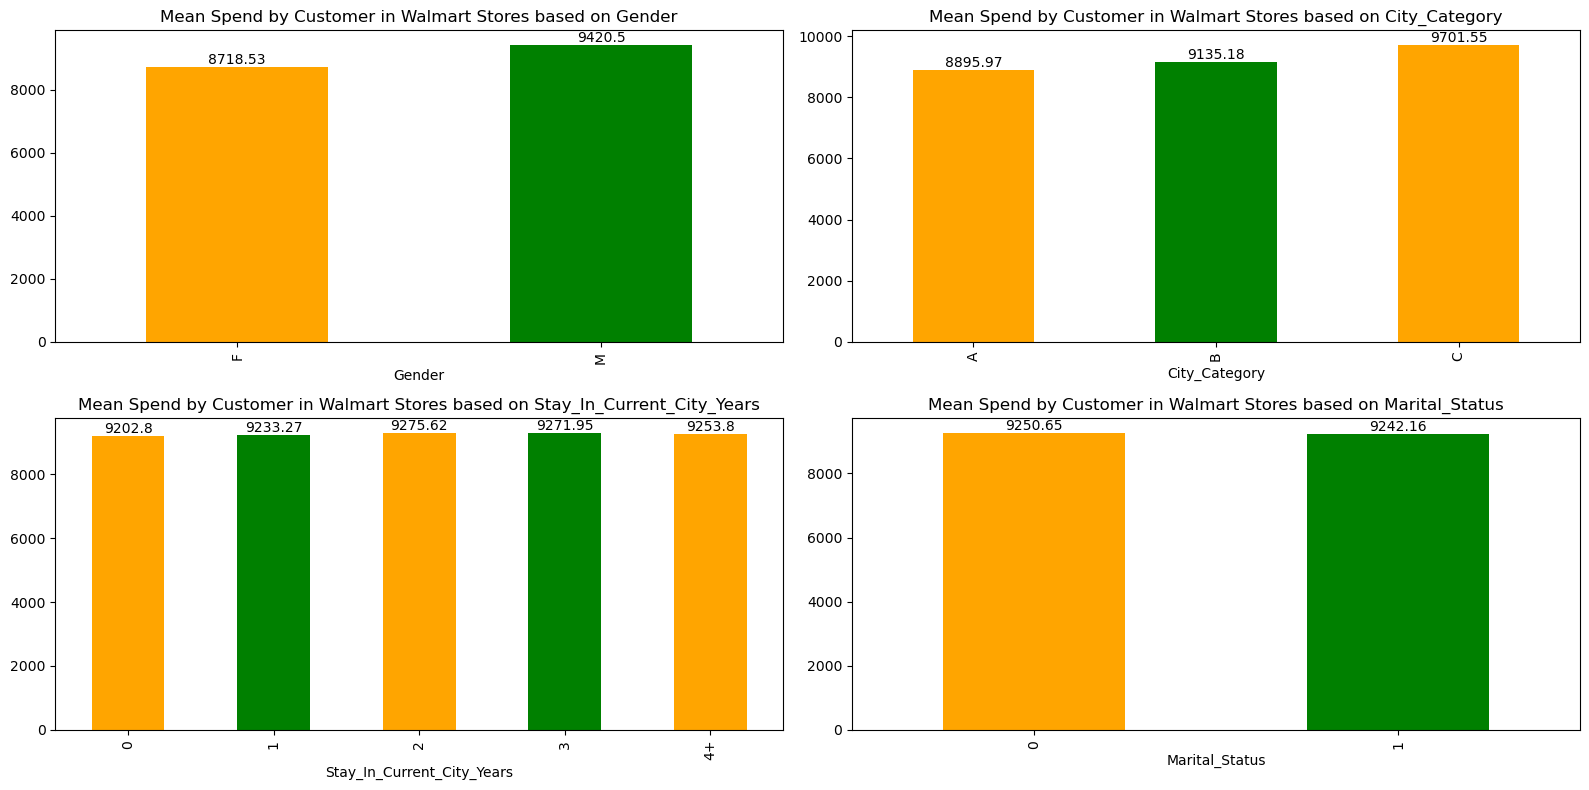

In [60]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title("Mean Spend by Customer in Walmart Stores based on Gender")
ax1 = df.groupby("Gender")["Purchase"].mean().plot(kind="bar",color =["orange","green"])
for container in ax1.containers:
        ax1.bar_label(container)

plt.subplot(2,2,2)
plt.title("Mean Spend by Customer in Walmart Stores based on City_Category")
ax2=df.groupby("City_Category")["Purchase"].mean().plot(kind="bar",color =["orange","green"])
for container in ax2.containers:
        ax2.bar_label(container)



plt.subplot(2,2,3)
plt.title("Mean Spend by Customer in Walmart Stores based on Stay_In_Current_City_Years")
ax3=df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind="bar",color =["orange","green"])
for container in ax3.containers:
        ax3.bar_label(container)

plt.subplot(2,2,4)
plt.title("Mean Spend by Customer in Walmart Stores based on Marital_Status")
ax4=df.groupby("Marital_Status")["Purchase"].mean().plot(kind="bar",color =["orange","green"])
for container in ax4.containers:
        ax4.bar_label(container)


plt.tight_layout()
plt.show()

# Insights-:

1)-Gender-Based Spending:On average, male customers spend more than female customers at Walmart.
    
2)-City-Wise Average Spend:City C records the highest average spend per customer at $9,701, significantly more than City B and City A.
    
3)- Impact of Residency Tenure:Customer tenure in the city does not significantly affect spending—average spend remains consistent regardless of how long a person has lived in the city.
    
4)-Marital Status and Spending:Marital status has minimal influence on spending behavior, with average spend being nearly the same for both married and unmarried individuals.

# (C) - Find the Top SKUs,Products and their Category by revenue

In [64]:
name = df.groupby(["SKU","Product_Name","Product_Category_Name"])["Purchase"].sum().sort_values(ascending=False).head(5)
most_selling = pd.DataFrame(name)
most_selling

,,,Purchase
SKU,Product_Name,Product_Category_Name,
APP-SAM-145,Samsung Appliances 809,Appliances,56034545.0
ELEC-SON-628,Sony Electronics 476,Electronics,53469309.0
APP-LG-951,LG Appliances 133,Appliances,50225518.0
HLT-PHI-686,Philips Health 468,Health,48657961.5
ELEC-SON-463,Sony Electronics 513,Electronics,48627305.0


# (D) - Find 5 least selling SKUs,Products and their Category by revenue

In [67]:
name = df.groupby(["SKU","Product_Name","Product_Category_Name"])["Purchase"].sum().sort_values(ascending=True).head(5)
least_selling = pd.DataFrame(name)
least_selling

,,,Purchase
SKU,Product_Name,Product_Category_Name,
ELEC-APP-775,Apple Electronics 636,Electronics,810.0
APP-LG-999,LG Appliances 806,Appliances,1417.0
COMP-DEL-898,Dell Computers 797,Computers,3037.0
ELEC-TOS-867,Toshiba Electronics 678,Electronics,3149.0
ELEC-TOS-150,Toshiba Electronics 167,Electronics,3507.0


# Insights-:
1) APP-SAM-145 by Samsung Appliances 809 is on of the highest-selling Walmart SKUs from Appliance Category
2) ELEC-SON-628 by Sony Electronics 476 is the highest-selling SKUs from Electronics Category
3) ELEC-APP-775 by Apple Electronics 636 is lowest -selling SKUs from Electronics Category
4) APP-LG-999	by LG Appliances 806	is the lowest-selling SKUs from Appliance Category

# (E) -Which combinations of Age, Gender, and Marital_Status yield the highest average purchase?

In [71]:
result = df.groupby(["Age", "Gender", "Marital_Status"])["Purchase"].mean().sort_values(ascending=False).head(1)
print("Top spending group:")
print(result)

Top spending group:
Age  Gender  Marital_Status
55+  M       0                 9510.587853
Name: Purchase, dtype: float64


# Insights-:
1) Unmarried males aged 55+ represent the highest average spenders at Walmart.
2) This indicates that male customers over 55 who are unmarried form a high-value segment, and targeted marketing or loyalty programs toward this group could yield significant returns.

# (F)- Are there significant purchase behavior differences across occupations when grouped by city?

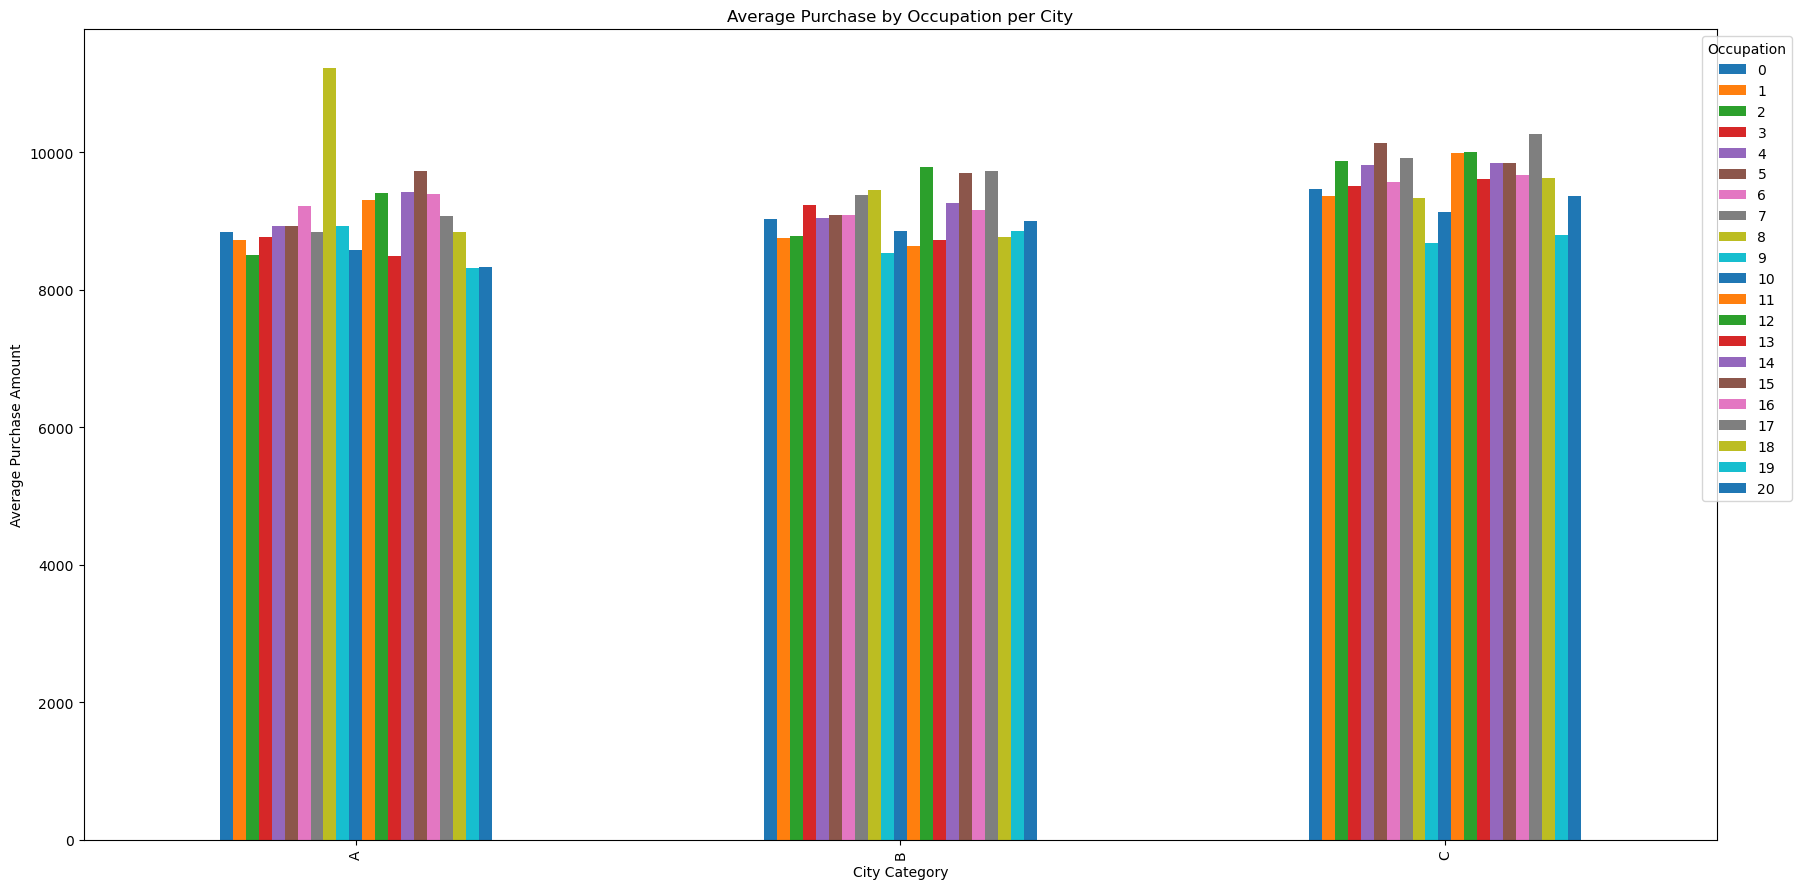

In [75]:
df.groupby(["City_Category", "Occupation"])["Purchase"].mean().unstack().plot(kind="bar", figsize=(18, 9))
plt.title("Average Purchase by Occupation per City")
plt.ylabel("Average Purchase Amount")
plt.xlabel("City Category")
plt.legend(title="Occupation", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# Insights-
 Occupation 8 tend to Buy Much more and Have Higher Purcahse in City A whereas in City B and CIty C the Average Purchase Remain consistent across all occupations.

# 6 -Customer Segmentation(Using K-means Clustering)

In [79]:
from sklearn.cluster import KMeans
features = ["Gender","Age","City_Category","Marital_Status","Product_Category_Name"]
X = pd.get_dummies(df[features])
scaler = StandardScaler().fit_transform(X)

model  =KMeans(n_clusters=4,random_state=42)
df["Customer_Segment"] = model.fit_predict(scaler)


# 7- EDA for Customer Segmentation

# 1- Segment Overview

# (A)-How many customers are in each segment?

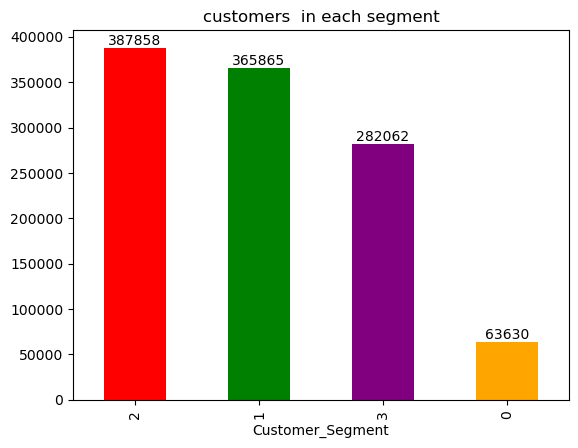

In [83]:
plt.title("customers  in each segment")
ax = df["Customer_Segment"].value_counts().plot(kind="bar",color=["Red","green","purple","orange"])
for container in ax.containers:
      ax.bar_label(container)

# Insights-:
Segemnt 2 have Most Number of Customers(387858),whereas Segemnt 0 have been assigned with least number of customers(63630)

# (B)-Which segment has the highest average purchase value?

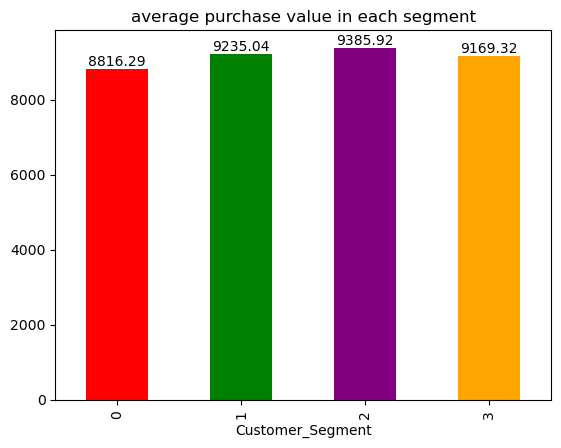

In [88]:
plt.title("average purchase value in each segment")
ax = df.groupby("Customer_Segment")["Purchase"].mean().plot(kind="bar",color=["Red","green","purple","orange"])
for container in ax.containers:
      ax.bar_label(container)

# Insights-:
1) Segemnt 2 have  highest numbers of customer and highest average purchase value of 9385 dollars showing that Segment 2 consist of high-value or High high-spend customers
2) We cam do targeted marketing or loyalty programs toward Segemnt 2 and it could yield significant returns.
3) Segment 0 have lowest average purcahse value of aroung 8816 dollars.

# (C)-What is the total revenue contribution of each segment?

Customer_Segment
0    5.609805e+08
1    3.378777e+09
2    3.640405e+09
3    2.586316e+09
Name: Purchase, dtype: float64

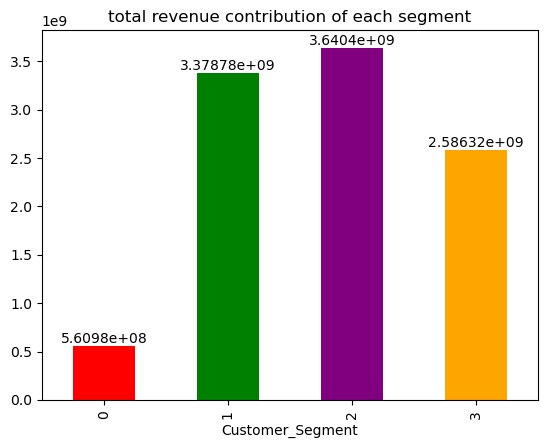

In [92]:
plt.title("total revenue contribution of each segment")
ax = df.groupby("Customer_Segment")["Purchase"].sum().plot(kind="bar",color=["Red","green","purple","orange"])
for container in ax.containers:
      ax.bar_label(container)
df.groupby("Customer_Segment")["Purchase"].sum()

# Insights-:

Segment 2: High Volume & High Revenue
Segment 2 not only has the largest customer base but also generates the highest total revenue, approximately $30 million, indicating strong performance and engagement.

Segment 0: Low Volume & Low Revenue
Segment 0 has the smallest customer base and contributes the least to total revenue, with approximately $5 million, suggesting a low-priority segment for investment.


# 2 -Demographic Distribution

# (A)-What is the most common age group in each segment?

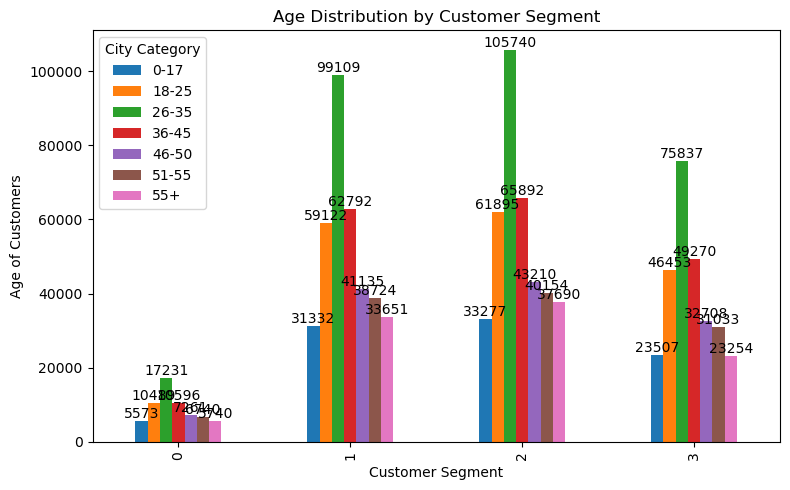

In [97]:
import matplotlib.pyplot as plt

city_segment = pd.crosstab(df["Customer_Segment"], df["Age"])

ax = city_segment.plot(kind="bar", stacked=False, figsize=(8, 5))
for container in ax.containers:
     ax.bar_label(container)
plt.title("Age Distribution by Customer Segment")
plt.ylabel("Age of Customers")
plt.xlabel("Customer Segment")
plt.legend(title="City Category")
plt.tight_layout()
plt.show()

# Insights-:
Across all segments, the most common customer age group is 26–35 years.
This suggests Walmart’s core customer base lies within this demographic.

# Recommendation: 
Optimize inventory and marketing campaigns to align with the preferences and demands of the 26–35 age group to drive higher sales and maximize ROI.
Least Represented Age Group: 0–17 Years

The least common age group among Walmart customers is 0–17 years.This is expected, as teenagers are less likely to be primary purchasers.

# (C) - What is the gender ratio (M/F) in each segment?

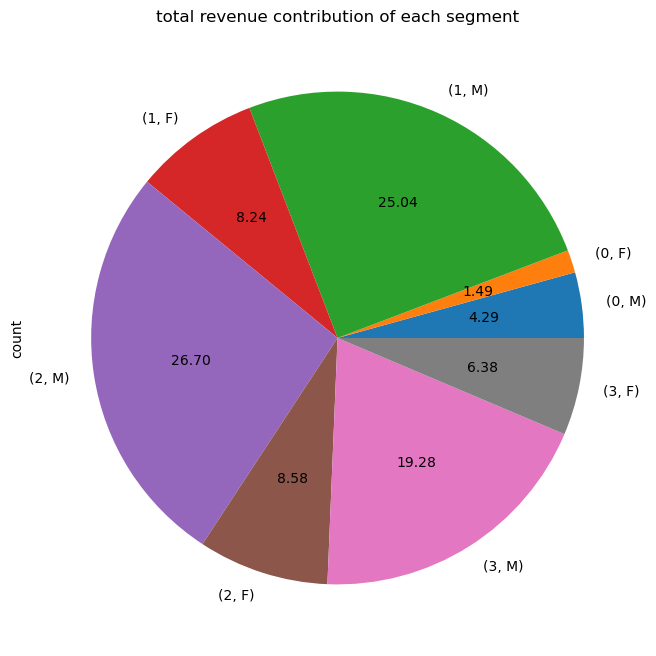

In [101]:
plt.figure(figsize=(16,8))
plt.title("total revenue contribution of each segment")
df.groupby("Customer_Segment")["Gender"].value_counts().plot(kind="pie",autopct="%0.2f",color=["Red","green","purple","orange"])
plt.show()

# (C)-Which city category (A, B, C) dominates each segment?

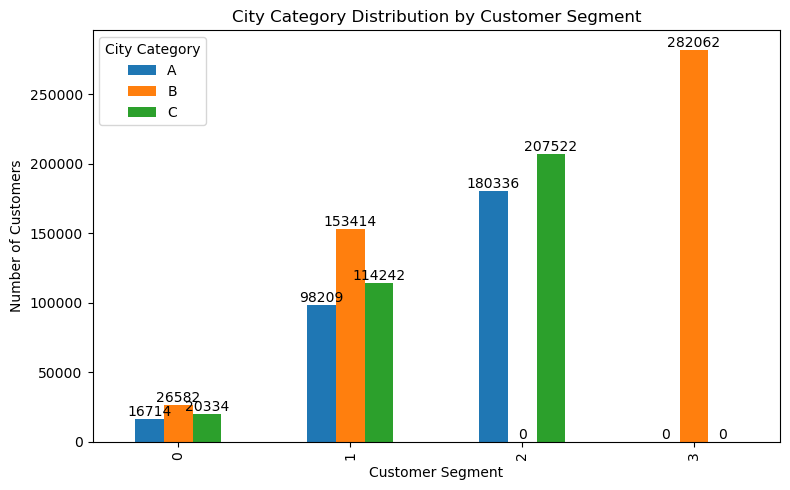

In [104]:
import matplotlib.pyplot as plt

city_segment = pd.crosstab(df["Customer_Segment"], df["City_Category"])

ax = city_segment.plot(kind="bar", stacked=False, figsize=(8, 5))
for container in ax.containers:
     ax.bar_label(container)
plt.title("City Category Distribution by Customer Segment")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Segment")
plt.legend(title="City Category")
plt.tight_layout()
plt.show()


# Insights-: 
City B has a strong presence across Segment 3, Segment 2, and Segment 0, indicating broad customer engagement in this region across multiple segments.


City C shows dominance specifically in Segment 2, suggesting a more targeted or concentrated high-value audience in that segment.

# (D) -Are there differences in marital status across segments?

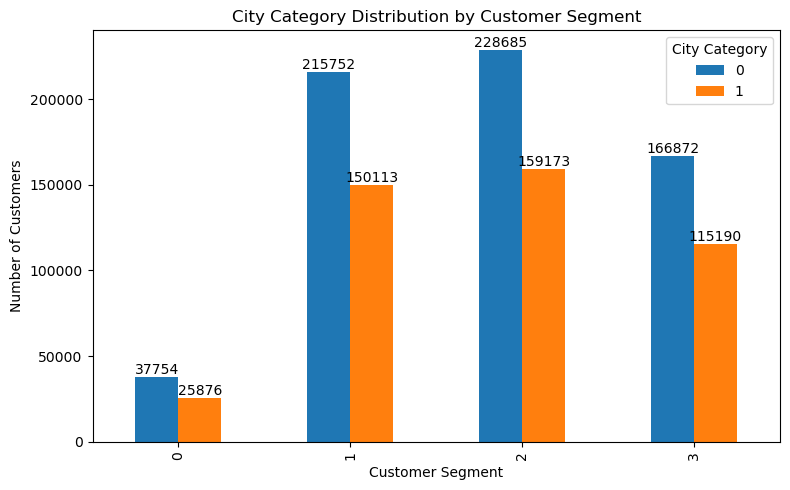

In [108]:
import matplotlib.pyplot as plt

city_segment = pd.crosstab(df["Customer_Segment"], df["Marital_Status"])

ax = city_segment.plot(kind="bar", stacked=False, figsize=(8, 5))
for container in ax.containers:
     ax.bar_label(container)
plt.title("City Category Distribution by Customer Segment")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Segment")
plt.legend(title="City Category")
plt.tight_layout()
plt.show()


# Insights-:

Unmarried customers dominate all segments, with no significant variation in marital status distribution across them.
This highlights that Walmart has a consistently strong base of unmarried shoppers.

# Recommendation:
Develop targeted strategies and loyalty programs specifically designed for unmarried individuals across segments. This can help maximize engagement, increase revenue, and ultimately deliver a better return on investment (ROI).



# 3 -Occupation & Stay Analysis

# (A)-What are the top 3 occupations in each segment?

In [113]:
data = pd.DataFrame(df.groupby("Customer_Segment")["Occupation"].value_counts().groupby(level=0).head(3))
data

count
Customer_Segment Occupation       
0                4            8694
                 0            7914
                 7            6614
1                4           47958
                 0           46261
                 7           39648
2                4           51604
                 0           48684
                 7           43774
3                0           36327
                 4           36288
                 7           28160

# (B) -How does Stay_In_Current_City_Years vary across segments?

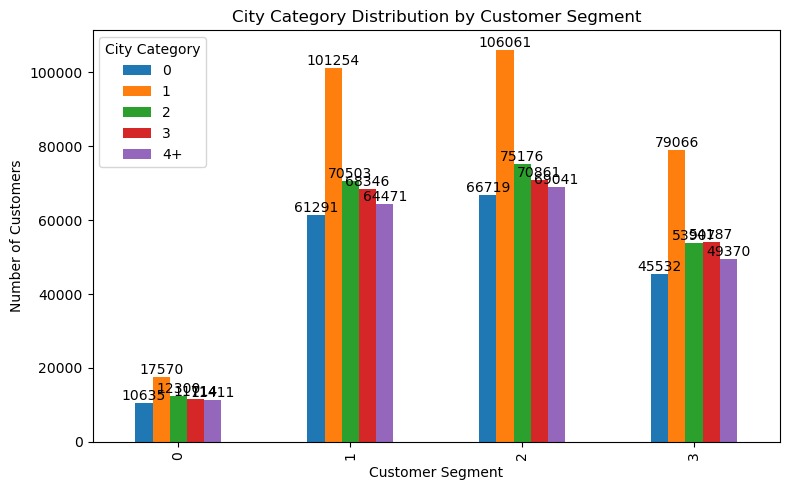

In [116]:
import matplotlib.pyplot as plt

city_segment = pd.crosstab(df["Customer_Segment"], df["Stay_In_Current_City_Years"])

ax = city_segment.plot(kind="bar", stacked=False, figsize=(8, 5))
for container in ax.containers:
     ax.bar_label(container)
plt.title("City Category Distribution by Customer Segment")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Segment")
plt.legend(title="City Category")
plt.tight_layout()
plt.show()


# 4 -Product Behavior


# (A)-What are the top 3 product categories purchased in each segment?

In [120]:
data=pd.DataFrame(df.groupby("Customer_Segment")["Product_Category_Name"].value_counts().groupby(level=0).head(3))
data

count
Customer_Segment Product_Category_Name        
0                Mobile                  63630
1                Electronics            365865
2                Computers              231586
                 Appliances              96905
                 Entertainment           31638
3                Computers              168787
                 Appliances              69850
                 Entertainment           23160

# Insights-:
1- Appliances,Computers,Entertainment are top 3 Product categories in Segemnt2 and Segment 3

2 - Electronics is only 1 category in Segemnt 1

3 - Mobile is only category in Segment 0

# (B) -Do some segments prefer specific brands or categories more than others?

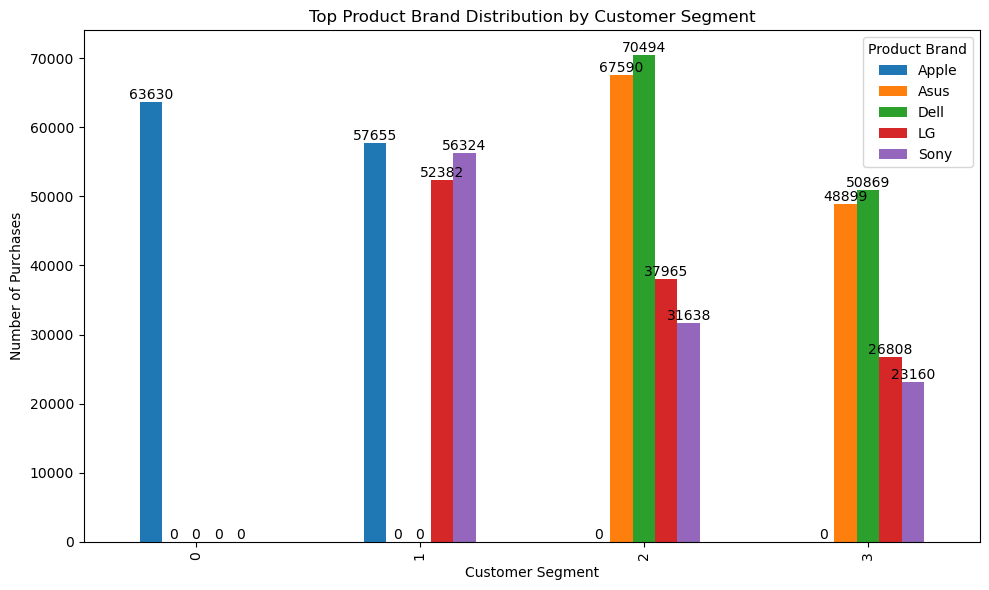

In [124]:
# Limit to top 5 or top 10 brands
top_brands = df["Product_Brand"].value_counts().head(5).index
filtered_df = df[df["Product_Brand"].isin(top_brands)]

brand_segment = pd.crosstab(filtered_df["Customer_Segment"], filtered_df["Product_Brand"])

ax = brand_segment.plot(kind="bar", stacked=False, figsize=(10, 6))
for container in ax.containers:
    ax.bar_label(container)

plt.title("Top Product Brand Distribution by Customer Segment")
plt.ylabel("Number of Purchases")
plt.xlabel("Customer Segment")
plt.legend(title="Product Brand")
plt.tight_layout()
plt.show()


# Insights-:
1 -100% of products in Segment 0 are from Apple, indicating this segment is highly brand-loyal or focused on Apple products only.

2-Segment 1 shows a slight preference for Apple over other brands like LG and Sony, suggesting moderate brand affinity.

3 -Customers in Segment 2 heavily prefer Dell and Asus, indicating a strong demand for performance-driven or value-for-money tech products.

4 -Segment 4 also shows a strong preference for Dell and Asus, reinforcing these brands as top performers in multiple customer clusters.

# (c)-Which segment spends the most on high-ticket items?

In [128]:
threshold= df["Purchase"].quantile(0.75)
df["high_ticket"] = df["Purchase"]>=threshold
high_ticket_by_segment = df.groupby("Customer_Segment")["high_ticket"].mean().sort_values(ascending=False)
print(high_ticket_by_segment)


Customer_Segment
2    0.264019
3    0.249342
1    0.243964
0    0.202247
Name: high_ticket, dtype: float64


# High-Value vs. Low-Value Segment Spending Insights

1 -Segment 2 customers spend the most on high-ticket items, indicating they consistently purchase more expensive products.
This confirms that Segment 2 consists of VIP, affluent, or high-value customers.

# Recommendation
    
Implement exclusive loyalty programs, premium offers, and personalized marketing to retain and further monetize this valuable segment.



Segment 0 has the fewest customers and shows the least interest in expensive products.
This suggests a low-priority segment where resource allocation should be minimal or highly optimized.


# 5- Purchase Insights

# (A) -How does the distribution of purchase amounts vary by segment? (boxplot)

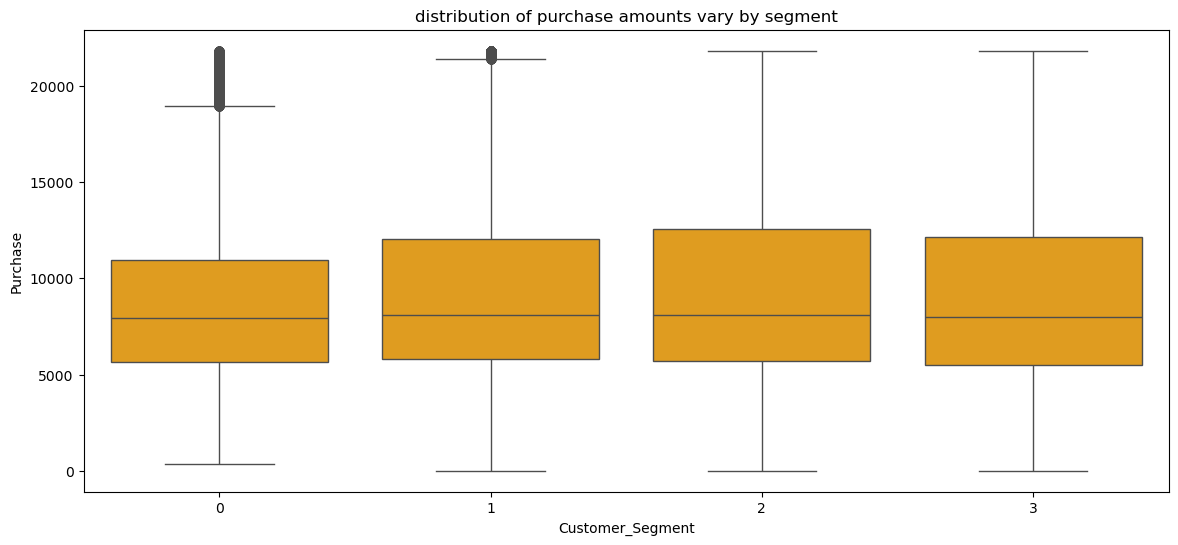

In [133]:
plt.figure(figsize=(14,6))
sns.boxplot(x="Customer_Segment",y="Purchase",data=df,color="orange")
plt.title("distribution of purchase amounts vary by segment")
plt.show()

# (B)- Do any segments appear to represent high-value or VIP customers?

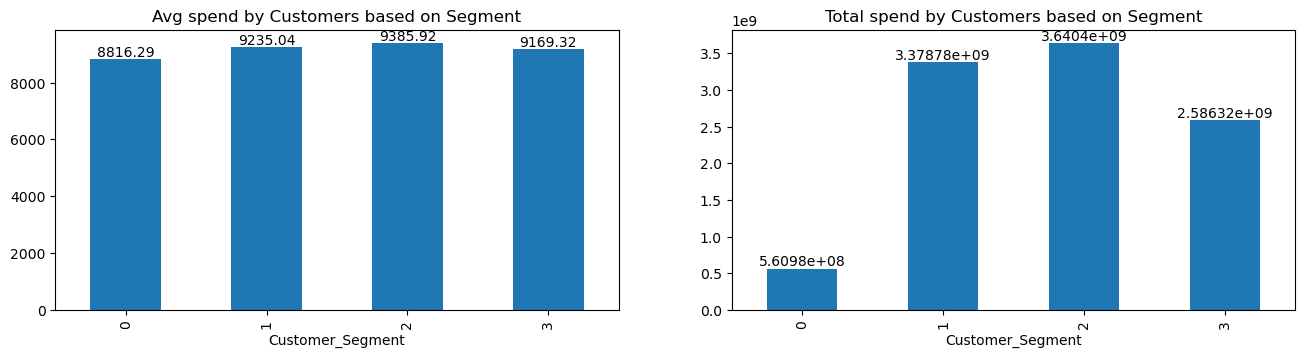

In [135]:
# high value customer tho who have more avergae nad total spend on products
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title("Avg spend by Customers based on Segment")
ax =df.groupby("Customer_Segment")["Purchase"].mean().plot(kind="bar")
for container in ax.containers:
     ax.bar_label(container)
plt.subplot(2,2,2)
plt.title("Total spend by Customers based on Segment")
ax =df.groupby("Customer_Segment")["Purchase"].sum().plot(kind="bar")
for container in ax.containers:
     ax.bar_label(container)
plt.show()



# Segemt 3 have vip customers

# Insights-:
Segment 2 customers spend the most on high-ticket items, indicating they consistently purchase more expensive products.
This confirms that Segment 2 consists of VIP, affluent, or high-value customers.



# 7 -  Making a Predictive Analytics Model

In [241]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# Load and clean dataset ===
df = df.loc[:, ~df.columns.duplicated()]  

# === 2. Light Feature Engineering ===
df["Product_Frequency"] = df.groupby("Product_Category_Name")["User_ID"].transform("count")
df["SKU_Popularity"] = df["SKU"].map(df["SKU"].value_counts())
df["Rel_Popularity"] = df["SKU_Popularity"] / df["Product_Frequency"]
df["high_ticket"] = (df["z_score"] > 1).astype(int)  



selected_features = [
    "Gender", "Age", "Occupation", "City_Category",
    "Product_Category", "Customer_Segment",
    "high_ticket", "Product_Frequency",
    "SKU_Popularity", "Rel_Popularity"

]


X = df[selected_features].copy()
y = df["Purchase"]

# One-hot encode categorical variables 
X = pd.get_dummies(X, drop_first=True)

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype("category").cat.codes

# Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model ===
model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.08,
    subsample=0.85,
    colsample_bytree=0.85,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate ===
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Model Performance")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


📊 Model Performance
R² Score: 0.8303
RMSE: 2062.12


# Evaluating the model 

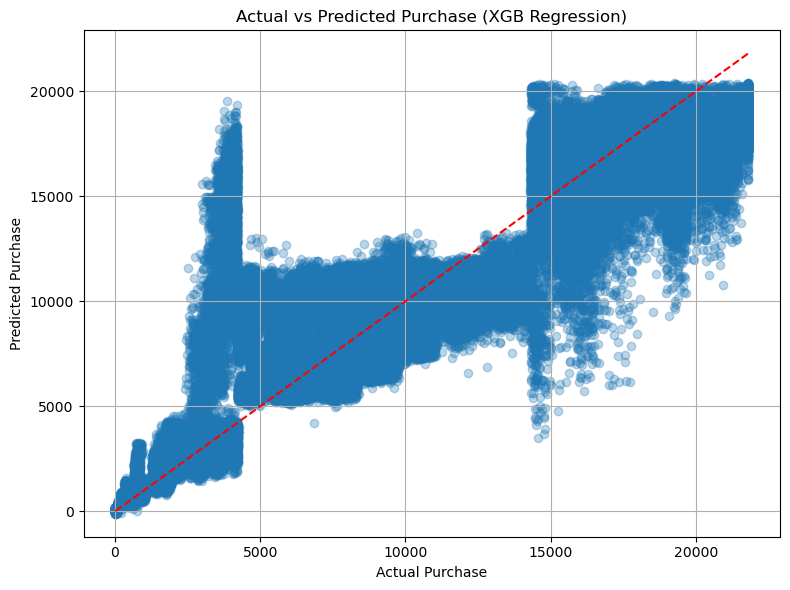

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.title("Actual vs Predicted Purchase (XGB Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


 # Predicting purchase for a new user 

In [249]:
sample_dict = {
    'Gender': 'M',
    'Age': '18-25',
    'Occupation': 12,
    'City_Category': 'C',
    'Product_Category': 3,
    'Customer_Segment': 2,
    'high_ticket': 1,
    'Product_Frequency': 150,
    'SKU_Popularity': 300,
    'Rel_Popularity': 2.0
}
# Create DataFrame from custom row
sample_custom = pd.DataFrame([sample_dict])

# One-hot encode
sample_encoded = pd.get_dummies(sample_custom, drop_first=True)

# Match training columns
sample_encoded = sample_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict
predicted_purchase = model.predict(sample_encoded)[0]
print(f"🧾 Predicted Purchase (Custom Row): {predicted_purchase:.2f}")


🧾 Predicted Purchase (Custom Row): 6277.86


# 8 -  Exporting Data For Tableau Visualisation

In [76]:
df.to_csv("Walmart_Preprocessed_data.csv",index=False)
df